# Assignment-6

This notebook contains the questions to test the proficiency in `Statistics`.

### Date: 28th June, 2025

### Steps to solve and upload the assignment 

- Download the notebook in your local machine.
- Solve the questions in the notebook and save it.
- Rename the file as `Assignment-06-<your_name>_<your_surname>.ipynb`. For example if your name is Dipika Chopra then name the file as `Assignment-06-Dipika_Chopra.ipynb`.
- For numerical problems you can either solve the same using using python in the solution notebook or you can solve it on paper and upload the scan pdf copy of the solution. 
- If you are solving it on paper then name the pdf file of the scan copy of the solution as `Assignment-06-<your_name>_<your_surname>.pdf`. For example if your name is Akash Kumar then name the file as `Assignment-06-Akash_Kumar.pdf`.
- Upload the solved notebook and the scanned pdf copy of the solutions in the google drive location: https://drive.google.com/drive/folders/1VW5Z6l5r0mQTFbvvlhNNHnIlJ8A0yG5c?usp=sharing
<h3><span style="color:red"> Deadline: 19th July, 2025 </span></h3>

<h5><span style="color:blue"> <b>Instructions:</b> Please answer all the questions. For problems requiring numerical solutions, you are encouraged to write code in Python to compute the results. Show your steps and explain your reasoning. </span></h5>

### Problem-1

A startup company with 20 employees recorded their annual salaries (in INR Lakhs):
`[6.5, 7.2, 8.0, 6.8, 9.5, 7.0, 15.0, 7.5, 8.2, 6.9, 7.8, 10.5, 7.1, 8.5, 6.7, 7.3, 7.9, 9.0, 8.8, 7.6]`

(a) Calculate the mean, median, and mode of the salaries.

(b) Determine the range, variance, and standard deviation of the salaries.

(c) Calculate the Interquartile Range (IQR). What does the IQR tell you about the salary distribution?

(d) Construct a box plot for the salaries. Identify any potential outliers.


(a) Mean: 8.19, Median: 7.70, Mode: 6.50
(b) Range: 8.50, Variance: 3.62, Std Dev: 1.90
(c) IQR: 1.50
(d) Potential Outliers: [15.0]


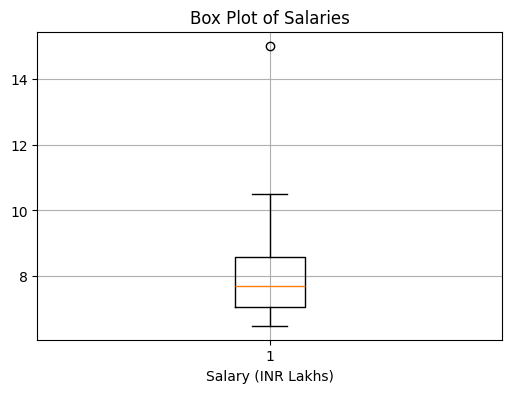

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

salary = [6.5, 7.2, 8.0, 6.8, 9.5, 7.0, 15.0, 7.5, 8.2, 6.9, 
          7.8, 10.5, 7.1, 8.5, 6.7, 7.3, 7.9, 9.0, 8.8, 7.6]

# ------------------------
# (a) Mean, Median, Mode
# ------------------------
mean_salary = np.mean(salary)
median_salary = np.median(salary)
mode_salary = stats.mode(salary, keepdims=True).mode[0]

print(f"(a) Mean: {mean_salary:.2f}, Median: {median_salary:.2f}, Mode: {mode_salary:.2f}")

# ------------------------
# (b) Range, Variance, Standard Deviation
# ------------------------
salary_range = np.max(salary) - np.min(salary)
variance = np.var(salary, ddof=1)  # sample variance
std_dev = np.std(salary, ddof=1)   # sample std deviation

print(f"(b) Range: {salary_range:.2f}, Variance: {variance:.2f}, Std Dev: {std_dev:.2f}")

# ------------------------
# (c) Interquartile Range (IQR)
# ------------------------
q1 = np.percentile(salary, 25)
q3 = np.percentile(salary, 75)
iqr = q3 - q1

print(f"(c) IQR: {iqr:.2f}")

# ------------------------
# (d) Box Plot & Outliers
# ------------------------
# Calculate outliers based on IQR rule
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr
outliers = [s for s in salary if s < lower_bound or s > upper_bound]

print(f"(d) Potential Outliers: {outliers}")

# Plotting
plt.figure(figsize=(6, 4))
plt.boxplot(salary, vert=True)
plt.title("Box Plot of Salaries")
plt.xlabel("Salary (INR Lakhs)")
plt.grid(True)
plt.show()


### Problem-2

A tech company conducted a customer satisfaction survey, rating their latest product on a scale of 1 to 10 (10 being highly satisfied). The scores from 30 randomly selected customers are:
[7, 8, 9, 6, 7, 8, 10, 5, 7, 8, 9, 7, 6, 8, 7, 9, 10, 6, 7, 8, 5, 9, 8, 7, 6, 7, 8, 9, 7, 8]

(a) Create a frequency distribution table for these scores.

(b) Plot a histogram of the customer satisfaction scores. Describe the shape of the distribution (e.g., symmetric, skewed).

(c) Calculate the Pearson's (first and second) coefficients of skewness for this data. Interpret the values.

(d) Calculate the excess kurtosis for this data using sample kurtosis formula. What does the kurtosis value suggest about the tails of the distribution?

In [161]:
# Customer satisfaction scores
scores = [7, 8, 9, 6, 7, 8, 10, 5, 7, 8, 9, 7, 6, 8, 7, 9, 10, 6, 7, 8, 5, 9, 8, 7, 6, 7, 8, 9, 7, 8]

# (a) Frequency distribution function
def freq_dist(data):
    freq = {}
    for val in sorted(set(data)):
        freq[val] = data.count(val)
    return freq

# Generate frequency dictionary
freq_dict = freq_dist(scores)

# Convert to pandas DataFrame
freq_df = pd.DataFrame(freq_dict.items(), columns=['Score', 'Frequency'])

# Display the DataFrame
print("Frequency Distribution Table:")
print(freq_df)

Frequency Distribution Table:
   Score  Frequency
0      5          2
1      6          4
2      7          9
3      8          8
4      9          5
5     10          2


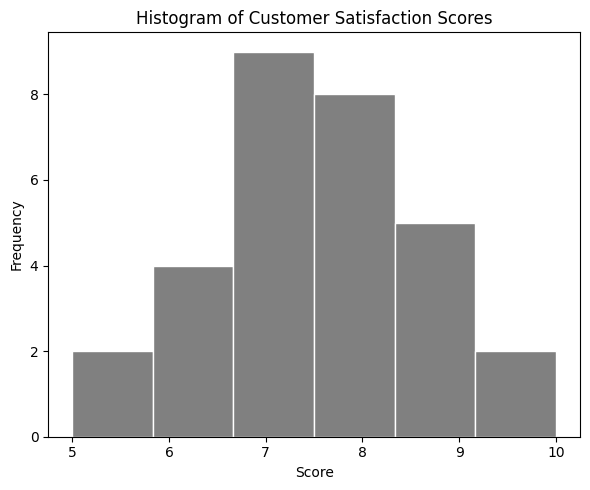

In [ ]:
import matplotlib.pyplot as plt

# (b) Plot a histogram of the customer satisfaction scores
plt.figure(figsize=(6, 5))
plt.hist(scores, bins=len(set(scores)), color='grey', edgecolor='white')
plt.title('Histogram of Customer Satisfaction Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

$$
\text{The shape of the distribution is approximately normal/symmetric.}
$$

$$
\text{Pearson coeff} = \frac{\text{Cov}(X, Y)}{\sqrt{\text{Var}(X)} \cdot \sqrt{\text{Var}(Y)}}
$$

In [169]:
# (c) Calculate the Pearson's (first and second) coefficients of skewness for this data. Interpret the values.

def covariance(X, Y):
    x_bar = X.mean()
    y_bar = Y.mean()
    n = X.shape[0]
    cov = ((X - x_bar) @ (Y - y_bar)) / (n - 1)  # sample covariance
    return cov

# Sample standard deviations
std_x = np.std(freq_df['Score'], ddof=1)
std_y = np.std(freq_df['Frequency'], ddof=1)

# Sample covariance
cov = covariance(freq_df['Score'], freq_df['Frequency'])

# Pearson's correlation coefficient
corr = cov / (std_x * std_y)

print(f'The Pearson correlation coefficient is: {corr:.7f}')

The Pearson correlation coefficient is: 0.0360375


In [187]:
# (d) Calculate the excess kurtosis for this data using sample kurtosis formula.

from scipy.stats import kurtosis

# Calculate excess kurtosis (sample version)
excess_kurt = kurtosis(scores)  # default fisher=True → gives excess kurtosis

print(f"Excess Kurtosis: {excess_kurt:.4f}")

Excess Kurtosis: -0.5140


$$
\text{Since kurtosis } < 0 \text{, this distribution has light tails and a lower probability of extreme values.}
$$


### Problem-3

A marketing team wants to understand the relationship between their monthly advertising expenditure (in INR Lakhs) and corresponding sales revenue (in INR Lakhs) over the last 10 months.

| Month | Advertising Spend (X) | Sales Revenue (Y) |
|-------|-----------------------|-------------------|
|     1 |                     5 |                52 |
|     2 |                     7 |                65 |
|     3 |                     6 |                60 |
|     4 |                     8 |                70 |
|     5 |                     5 |                55 |
|     6 |                     9 |                75 |
|     7 |                     7 |                68 |
|     8 |                    10 |                80 |
|     9 |                     6 |                58 |
|    10 |                     8 |                72 |


(a) Calculate the covariance between advertising spend and sales revenue.

(b) Plot Sales Revenue vs Advertising spent.

(c) Calculate the Pearson correlation coefficient between advertising spend and sales revenue.

(d) Interpret the meaning of both the covariance and the correlation coefficient in the context of this data.

In [188]:
# (a)
import pandas as pd

# Define the data
data = {
    'month': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ad_spend': [5, 7, 6, 8, 5, 9, 7, 10, 6, 8],
    'revenue': [52, 65, 60, 70, 55, 75, 68, 80, 58, 72]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
# print(df)

def covariance(X, Y):
    x_bar = X.mean()
    y_bar = Y.mean()
    n = X.shape[0]
    cov = ((X - x_bar) @ (Y - y_bar)) / (n - 1)  # sample covariance
    return cov

# covariance
cov = covariance(df['ad_spend'], df['revenue'])
print(f'The Covariance is: {cov:.2f}')

# Sample standard deviations
std_x = np.std(df['ad_spend'], ddof=1)
std_y = np.std(df['revenue'], ddof=1)

# Pearson's correlation coefficient
corr = cov / (std_x * std_y)

print(f'The Pearson correlation coef is: {corr:.7f}')


The Covariance is: 14.94
The Pearson correlation coef is: 0.9852052


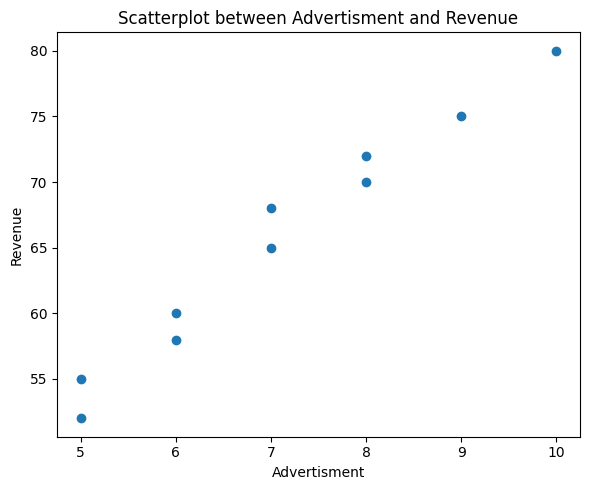

In [189]:
plt.figure(figsize=(6, 5))
plt.scatter(df['ad_spend'], df['revenue'])
# plt.hiscst(scores, bins=len(set(scores)), color='grey', edgecolor='white')
plt.title('Scatterplot between Advertisment and Revenue')
plt.xlabel('Advertisment')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

$$
\text{Since correlation coef is close to } 1 \text{, there is a very strong relationship between Advertisment and Revenue.}
$$


### Problem-4

A traffic department claims that the average daily commute time for residents in a certain city is 45 minutes. A researcher believes this claim is too low and collects data from a random sample of 100 residents. The sample mean commute time is 48 minutes with a standard deviation of 12 minutes.

(a) Formulate the null and alternative hypotheses for this scenario.

(b) Construct a 95% confidence interval for the true average daily commute time.

(c) Based on the confidence interval, what can you conclude about the traffic department's claim?

$$
H_0: \mu = 45 \quad \text{(The average daily commute time is 45 minutes)} \\
H_1: \mu > 45 \quad \text{(The average daily commute time is greater than 45 minutes)} \\
$$

In [217]:
# (b) Construct 95% Confidence Interval

import numpy as np
import scipy.stats as stats

# UDF
def z_alpha(alpha, tail):
    return stats.norm.ppf(1 - alpha) if tail == 'one' else stats.norm.ppf(1 - alpha / 2)

def z_statistic(sample_mean, pop_mean, se):
    return (sample_mean - pop_mean) / se

def p_value(z_stat):
    return stats.norm.sf(abs(z_stat))

def confidence_interval(mean, z, se):
    return [round(mean - z * se, 2), round(mean + z * se, 2)]

# Given
n = 100              # Sample size
pop_mean = 45        # Population mean (claimed)
sample_mean = 48     # Sample mean
std_dev = 12         # Sample standard deviation
conf_level = 0.95    # Confidence level
tail = 'one'         # Right-tailed test

# Calculations
alpha = 1 - conf_level
se = std_dev / np.sqrt(n)
z = z_alpha(alpha, tail)
ci = confidence_interval(sample_mean, z, se)
z_stat = z_statistic(sample_mean, pop_mean, se)
p = p_value(z_stat)

print(f"(b) 95% Confidence Interval: {ci}")

(b) 95% Confidence Interval: [np.float64(46.03), np.float64(49.97)]


$$
\text{95\% Confidence Interval: } [46.03,\ 49.97]
$$

In [220]:
# (c) Conclusion Based on Confidence Interval and p-value

print(f"(c) z-statistic: {z_stat:.2f}, p-value: {p:.3f}")

if p < alpha:
    print(f"Since p-value {p:.3f} < α = {alpha:.2f}, we reject the null hypothesis.")
else:
    print(f"Since p-value {p:.3f} > α = {alpha:.2f}, we fail to reject the null hypothesis.")

if pop_mean < ci[0]:
    print(f"Also, since the population mean {pop_mean} is below the lower CI boundary {ci[0]} ,")
    print("we conclude that the average daily commute time is greater than 45 minutes.")


(c) z-statistic: 2.50, p-value: 0.006
Since p-value 0.006 < α = 0.05, we reject the null hypothesis.
Also, since the population mean 45 is below the lower CI boundary 46.03 ,
we conclude that the average daily commute time is greater than 45 minutes.


### Problem-5

A manufacturing company wants to estimate the average number of units produced per hour by a new machine. They take 36 random observations and find the sample mean to be 150 units with a sample standard deviation of 15 units.

(a) What is the point estimate for the true average number of units produced per hour?

(b) Construct a 99% confidence interval for the true average number of units produced per hour.

(c) If the company wants to be 99% confident that their estimate is within 3 units of the true mean, what sample size would they need (assuming the same standard deviation)?

In [227]:
# The point estimate for the population mean is simply the sample mean.
# So, the best estimate of the true average number of units produced per hour is **150 units**.

$$
\hat{\mu} = \bar{x} = 150
$$

In [225]:
# Given data
n = 36                 # sample size
x_bar = 150            # sample mean
s = 15                 # sample standard deviation
conf_level = 0.99      # 99% confidence level

# Calculations
alpha = 1 - conf_level
z_critical = stats.norm.ppf(1 - alpha / 2)  # two-tailed
se = s / np.sqrt(n)
margin_of_error = z_critical * se

# Confidence interval
ci_lower = x_bar - margin_of_error
ci_upper = x_bar + margin_of_error
ci = (round(ci_lower, 2), round(ci_upper, 2))

print(f"(b) 99% Confidence Interval: {ci}")


(b) 99% Confidence Interval: (np.float64(143.56), np.float64(156.44))


We calculate the confidence interval using the formula:

$$
\text{CI} = \bar{x} \pm z_{\alpha/2} \cdot \frac{s}{\sqrt{n}}
$$

Substituting values:

$$
CI = 150 \pm 2.576 \cdot \frac{15}{\sqrt{36}} = 150 \pm 6.44
$$

$$
\text{99\% Confidence Interval: } [143.56,\ 156.44]
$$


In [226]:
# Desired margin of error
E = 3

# Required sample size formula
required_n = (z_critical * s / E) ** 2
required_n = int(np.ceil(required_n))  # round up to ensure it's sufficient

print(f"(c) Required sample size (for 99% confidence and ±3 margin): {required_n}")


(c) Required sample size (for 99% confidence and ±3 margin): 166


### Problem-6

A website designer believes that a new website redesign will increase the average time users spend on the site. Before the redesign, the average time spent was 3.5 minutes. After the redesign, a random sample of 50 users showed an average time of 3.8 minutes with a standard deviation of 1.0 minute.

(a) Perform a one-sided hypothesis test at a 0.05 significance level to determine if the redesign significantly increased the average time spent.

(b) State your null and alternative hypotheses, calculate the test statistic, and determine the p-value.

(c) What is your conclusion regarding the website redesign's impact?

$$
H_0: \mu = 3.5 \quad \text{(The redesign has no effect)} \\
H_1: \mu > 3.5 \quad \text{(The redesign increases average time)}
$$

In [232]:
# Inputs
mu = 3.5
x_bar = 3.8
s = 1.0
n = 50
alpha = 0.05

# Calculate standard error
se = s / np.sqrt(n)

# z-critical value for one-tailed test
z_crit = z_alpha(alpha, 'one')

# z-statistic
z_stat = z_statistic(x_bar, mu, se)

# p-value
p = p_value(z_stat)

print(f"Standard Error (SE): {se:.3f}")
print(f"Z-statistic: {z_stat:.3f}")
print(f"Z-critical (α = 0.05): {z_crit:.3f}")
print(f"P-value: {p:.3f}")


Standard Error (SE): 0.141
Z-statistic: 2.121
Z-critical (α = 0.05): 1.645
P-value: 0.017


Since the calculated z-statistic (2.12) is **greater** than the critical z-value (1.64), and
the p-value (0.017) is **less** than the significance level (0.05), we **reject the null hypothesis**.

**Conclusion**: There is statistically significant evidence that the website redesign will increase the average time users spend on the site.

### Problem-7

A company implemented a new training program to improve employee productivity. To assess its effectiveness, 15 employees' productivity scores were recorded before and after the training program. The scores are as follows:

| Employee | Before Training | After Training |
|----------|-----------------|----------------|
|        1 |              65 |             70 |
|        2 |              70 |             72 |
|        3 |              60 |             68 |
|        4 |              75 |             73 |
|        5 |              80 |             85 |
|        6 |              68 |             70 |
|        7 |              72 |             75 |
|        8 |              62 |             65 |
|        9 |              78 |             80 |
|       10 |              70 |             72 |
|       11 |              66 |             69 |
|       12 |              73 |             76 |
|       13 |              64 |             67 |
|       14 |              71 |             74 |
|       15 |              69 |             71 |

(a) State the null and alternative hypotheses to test if the training program significantly improved productivity.

(b) Conduct a paired samples t-test at a 0.05 significance level. Calculate the test statistic and the p-value.

(c) Based on your analysis, did the training program effectively improve employee productivity?

$$
\textbf{Null Hypothesis } (H_0): \text{ The training program has no effect.} \\
\mu_d = 0
$$

$$
\textbf{Alternative Hypothesis } (H_1): \text{ The program increases productivity.} \\
\mu_d < 0 \quad \text{(i.e., Before − After < 0)}
$$

$$
\text{This is a left-tailed paired t-test, because we're testing whether Before − After < 0}
$$

In [267]:
import pandas as pd
import numpy as np
from scipy import stats

# (a) Data
data = {
    'Before Training': [65, 70, 60, 75, 80, 68, 72, 62, 78, 70, 66, 73, 64, 71, 69],
    'After Training':  [70, 72, 68, 73, 85, 70, 75, 65, 80, 72, 69, 76, 67, 74, 71]
}
df = pd.DataFrame(data)

# (b) Calculate paired differences
df['Difference'] = df['Before Training'] - df['After Training']
d_bar = df['Difference'].mean()
s_d = df['Difference'].std()
n = len(df)
se = s_d / np.sqrt(n)
dof = n - 1

# (b) Hypothesis test functions
def t_statistic(mean_diff, mu_0, se): 
    return (mean_diff - mu_0) / se

def critical_value(alpha, dof): 
    return stats.t.ppf(alpha, dof)

def p_value(t_stat, dof): 
    return stats.t.cdf(t_stat, dof)  # Left-tailed

# Significance level
alpha = 0.05
t_crit = critical_value(alpha, dof)
t_stat = t_statistic(d_bar, 0, se)
p = p_value(t_stat, dof)

# (c) Output results
print(f"t-statistic: {t_stat:.3f}")
print(f"t-critical (α = 0.05): {t_crit:.3f}")
print(f"p-value: {p:.5f}")

# Interpretation
if t_stat < t_crit and p < alpha:
    print("Reject the null hypothesis: Training significantly increased productivity.")
else:
    print("Fail to reject the null hypothesis: No significant improvement observed.")


t-statistic: -5.358
t-critical (α = 0.05): -1.761
p-value: 0.00005
Reject the null hypothesis: Training significantly increased productivity.


Conclusion:
Based on the results the t-statistic is greater than t-critical value (in -ve direction) we can reject the null hypothesis and state that the new training program has been effective in increasing the scores 

### Problem-8

A battery manufacturer claims that their new 'ProLife' battery lasts longer than their existing 'Standard' battery. A consumer watchdog organization tests 40 'ProLife' batteries and 50 'Standard' batteries. The results are:

ProLife: Sample mean life = 120 hours, Sample standard deviation = 10 hours

Standard: Sample mean life = 115 hours, Sample standard deviation = 12 hours

(a) State the null and alternative hypotheses for testing the manufacturer's claim.

(b) Perform a z-test for two independent means at a 0.02 significance level.

(c) What is your conclusion regarding the manufacturer's claim about the 'ProLife' battery?

$$
\textbf{Null Hypothesis } (H_0): \mu_p = \mu_s \quad \text{(no difference)} \\
\textbf{Alternative Hypothesis } (H_1): \mu_s < \mu_p \quad \text{(ProLife lasts longer)} \\
\text{Right-tailed independent z-test at } \alpha = 0.02
$$

In [292]:
import numpy as np
from scipy import stats

# Sample data
x_s = 115   # Standard battery mean
x_p = 120   # ProLife battery mean

sd_s = 12   # Standard battery SD
sd_p = 10   # ProLife battery SD

n_s = 50    # Standard sample size
n_p = 40    # ProLife sample size

alpha = 0.02  # Significance level

# --- z-test for two independent means ---

# Step 1: Compute z-statistic
def z_statistic(x1, x2, s1, s2, n1, n2):
    numerator = x1 - x2
    denominator = np.sqrt((s1**2)/n1 + (s2**2)/n2) #formula for z-statistic for 2 independent samples
    return numerator / denominator

# Step 2: Compute z-critical value (right-tailed)
def z_critical(alpha):
    return stats.norm.ppf(1 - alpha)

# Step 3: Compute p-value from z-stat
def p_value(z_stat):
    return stats.norm.sf(z_stat)  # One-tailed (right side)

# Calculate
z_stat = z_statistic(x_p, x_s, sd_p, sd_s, n_p, n_s)
z_crit = z_critical(alpha)
p = p_value(z_stat)

# Output
print(f"Z-statistic: {z_stat:.3f}")
print(f"Z-critical value (α = 0.02): {z_crit:.3f}")
print(f"P-value: {p:.4f}")

# Conclusion
if z_stat > z_crit and p < alpha:
    print("Reject the null hypothesis: ProLife battery lasts longer.")
else:
    print("Fail to reject the null hypothesis: No significant evidence that ProLife lasts longer.")


Z-statistic: 2.156
Z-critical value (α = 0.02): 2.054
P-value: 0.0156
Reject the null hypothesis: ProLife battery lasts longer.


$$
\textbf{Conclusion:} \\
\text{Since the observed } z\text{-statistic is greater than the critical value (i.e., +ve; lies in the right tail),} \\
\text{we reject the null hypothesis. This provides sufficient evidence to conclude that the} \\
\text{ProLife battery has a longer life than the Standard battery.}
$$

### Problem-9

A popular restaurant chain claims that the average waiting time for a table on weekends is no more than 20 minutes. A local food critic believes it's longer. They record the waiting times (in minutes) for 30 randomly selected tables on various weekends:

`[22, 25, 18, 30, 28, 20, 23, 26, 19, 32, 21, 24, 27, 29, 20, 25, 23, 17, 31, 26, 22, 28, 20, 24, 27, 29, 21, 23, 25, 26]`

(a) Calculate the sample mean and sample standard deviation of the waiting times.

(b) Conduct a one-sided t-test at a 0.01 significance level to assess the food critic's belief.

(c) State your null and alternative hypotheses, calculate the test statistic, and determine the critical value.

(d) Based on your findings, what can you tell the food critic?

$$
H_0: \mu \leq 20 \quad \text{(The average waiting time is 20 minutes or less; restaurant’s claim)} \\

H_1: \mu > 20 \quad \text{(The average waiting time is greater than 20 minutes)} \\

\text{This is a one-sample right-tailed t-test at a given significance level (e.g., α=0.01)}
$$

In [ ]:
import numpy as np
from scipy import stats

samples = [22, 25, 18, 30, 28, 20, 23, 26, 19, 32, 21, 24, 27, 29, 20, 
           25, 23, 17, 31, 26, 22, 28, 20, 24, 27, 29, 21, 23, 25, 26]

# Sample statistics
x = np.mean(samples) #sample mean
s = np.std(samples, ddof=1)  # sample std dev
n = len(samples)
mu = 20 # pop mean
se = s / np.sqrt(n)
dof = n - 1
alpha = 0.01

# Functions
def t_statistic(x, mu, se): 
    return (x - mu) / se

def critical_value(alpha, dof): 
    return stats.t.ppf(1 - alpha, dof)  # right-tailed


def p_value(t_stat, dof): 
    return stats.t.sf(t_stat, dof)  # we use stats.t.sf for right-tail probability

# Calculations
t_stat = t_statistic(x, mu, se)
t_crit = critical_value(alpha, dof)
p = p_value(t_stat, dof)

# Output
print(f"Sample mean: {x:.2f}")
print(f"Sample std deviation: {s:.2f}")
print(f"Standard error: {se:.4f}")
print(f"t-statistic: {t_stat:.3f}")
print(f"t-critical (α = 0.01): {t_crit:.3f}")
print(f"p-value: {p:.5f}")

if t_stat > t_crit and p < alpha:
    print("Reject the null hypothesis: Average waiting time is greater than 20 minutes.")
else:
    print("Fail to reject the null hypothesis: Not enough evidence that wait time exceeds 20 minutes.")

Sample mean: 24.37
Sample std deviation: 3.93
Standard error: 0.7168
t-statistic: 6.092
t-critical (α = 0.01): 2.462
p-value: 0.00000
Reject the null hypothesis: Average waiting time is greater than 20 minutes.


**Conclusion:**

$$
t = 6.092 > t_{\text{critical}} = 2.462 \quad \text{and} \quad p < 0.01
$$

$$
\text{Reject the null hypothesis. There is strong evidence that the average waiting time is greater than 20 minutes}
$$


### Problem-10

A software company is launching a new application and offers three different subscription tiers (Basic, Premium, Elite), each with varying features. Before the full launch, they conduct a pilot study to see if there's an association between a customer's age group and their preferred subscription tier. They surveyed 300 randomly selected potential customers and recorded their age group and preferred tier:

| Age Group   | Basic | Premium | Elite | Total |
|-------------|-------|---------|-------|-------|
| 18-29 years |    45 |      60 | 15    | 120   |
| 30-49 years |    30 |      50 | 20    | 100   |
|   50+ years |    25 |      40 | 15    | 80    |
|       Total |   100 |     150 | 50    | 300   |


(a) State the null and alternative hypotheses for the test of independence in this context.

(b) Calculate the expected frequencies for each cell in the table, assuming the null hypothesis is true. Show your calculations clearly.

(c) Calculate the chi-square test statistic.

(d) Using a significance level of α=0.05, determine the critical value for this test.

(e) What is your conclusion? Is there a significant association between a customer's age group and their preferred subscription tier? Justify your answer based on your calculated chi-square statistic and the critical value.

$$
\textbf{Hypotheses:} \\

H_0: \text{There is no relationship between age group and subscription tiers.} \\

H_1: \text{There is a relationship between age group and subscription tiers.}
$$

In [21]:
import pandas as pd
import numpy as np
from scipy.stats import chi2, chi2_contingency

# (a) Data
data = {
    'Age Group': ['18-29 years', '30-49 years', '50+ years', 'Total'],
    'Basic': [45, 30, 25, 100],
    'Premium': [60, 50, 40, 150],
    'Elite': [15, 20, 15, 50],
    'Total': [120, 100, 80, 300]
}

df = pd.DataFrame(data)

# (b) Extract observed values (exclude 'Total' row and column)
observed = df.iloc[0:3, 1:4]  # 3 rows, 3 columns

# Compute row and column totals
row_totals = observed.sum(axis=1)
col_totals = observed.sum(axis=0)
grand_total = observed.values.sum()

# Compute expected frequencies
expected = pd.DataFrame(index=observed.index, columns=observed.columns, dtype=float)

for i in range(observed.shape[0]):
    for j in range(observed.shape[1]):
        expected.iloc[i, j] = (row_totals.iloc[i] * col_totals.iloc[j]) / grand_total

# (c) Compute chi-square test statistic manually
chisq_stat_manual = ((observed - expected) ** 2 / expected).values.sum()

# (d) Compute critical value
alpha = 0.05
dof = (observed.shape[0] - 1) * (observed.shape[1] - 1)
critical_value = chi2.ppf(1 - alpha, dof)

# (e) Print manual results
print("=== Manual Calculation ===")
print(f"Chi-square test statistic: {chisq_stat_manual:.3f}")
print(f"Degrees of freedom: {dof}")
print(f"Critical value (α = 0.05): {critical_value:.3f}")

if chisq_stat_manual > critical_value:
    print("Reject the null hypothesis: There is a significant association.")
else:
    print("Fail to reject the null hypothesis: No significant association.")

# Optional: (f) Compare with built-in SciPy function
chi2_stat, p_value, _, expected_builtin = chi2_contingency(observed)
print("\n=== SciPy Built-in Test ===")
print(f"Chi-square test statistic: {chi2_stat:.3f}")
print(f"p-value: {p_value:.4f}")

if p_value < alpha:
    print("Reject the null hypothesis based on p-value.")
else:
    print("Fail to reject the null hypothesis based on p-value.")

=== Manual Calculation ===
Chi-square test statistic: 3.187
Degrees of freedom: 4
Critical value (α = 0.05): 9.488
Fail to reject the null hypothesis: No significant association.

=== SciPy Built-in Test ===
Chi-square test statistic: 3.188
p-value: 0.5270
Fail to reject the null hypothesis based on p-value.


$$
\textbf{Conclusion:} \\

\text{Since the calculated chi-square test statistic } \chi^2 = 3.187 \text{ is less than the critical value } \chi^2_{0.05, 4} = 9.488, \text{ we fail to reject the null hypothesis.} \\

\text{There is no statistically significant evidence to suggest a relationship between age group and subscription tiers.}
$$

### Bonus Problem

An e-commerce company is testing two different designs for its product pages (Design A and Design B) to see if one leads to significantly higher conversion rates (percentage of visitors who make a purchase). They randomly assigned 50,000 website visitors to see Design A and another 50,000 visitors to see Design B over a two-week period. At the end of the period, they collected data on the conversion rates. Due to data collection specifics, they have daily average conversion rates for 30 randomly selected days for each design, rather than individual visitor data.

Here are the summary statistics for the daily average conversion rates (in percentage points):

* Design A (Sample 1):

    - Number of days ($n_A$) = 30
    - Mean Daily Conversion Rate ($\bar{x}_A$) = 2.85%
    - Sample Standard Deviation ($s_A$) = 0.45%

* Design B (Sample 2):

    - Number of days ($n_B$) = 30
    - Mean Daily Conversion Rate ($\bar{x}_B$) = 3.05%
    - Sample Standard Deviation ($s_B$) = 0.60%

The company is concerned that the variability in conversion rates might differ between the two designs due to different aesthetic elements or backend processes.

(a) State the null and alternative hypotheses to test if there is a significant difference in the average daily conversion rates between Design A and Design B. (Consider a two-tailed test, as they are looking for any significant difference).

(b) Before performing the t-test, you need to decide whether to assume equal or unequal population variances. For the purpose of this problem, assume that a prior test suggests unequal population variances.

(c) Calculate the appropriate test statistic (t-value) for comparing the two independent means, assuming equal population variances. Show all steps of your calculation.

(d) Determine the degrees of freedom for this test. 

(e) Using a significance level of α=0.05, determine the critical value(s) for your test.

(f) Based on your calculated test statistic and the critical value(s), what is your conclusion? Is there a statistically significant difference in the average daily conversion rates between Design A and Design B?

(g) Construct a 95% confidence interval for the difference between the true mean daily conversion rates $(μ_B - μ_A)$. Interpret this interval in the context of the problem.

$$
\textbf{Hypotheses:} \\

H_0: \mu_A = \mu_B \quad \text{(There is no difference in the average daily conversion rates between Design A and Design B)} \\

H_1: \mu_A \ne \mu_B \quad \text{(There is a difference in the average daily conversion rates between Design A and Design B)}
$$

In [ ]:
# Pooled t-test for equal variance

import numpy as np
from scipy import stats

# Given data
x_a, s_a, n_a = 2.85, 0.45, 30
x_b, s_b, n_b = 3.05, 0.60, 30
alpha = 0.05
ddof = n_a + n_b - 2

# Pooled standard deviation
s_p = np.sqrt(((n_a - 1) * s_a**2 + (n_b - 1) * s_b**2) / ddof)

# t-statistic
t_stat = (x_a - x_b) / (s_p * np.sqrt(1/n_a + 1/n_b))

# Critical value and p-value
t_crit = stats.t.ppf(1 - alpha / 2, ddof)
p_value = 2 * (1 - stats.t.cdf(abs(t_stat), ddof))

# Print results
print(f"Pooled Std Dev (s_p): {s_p:.4f}")
print(f"t-statistic: {t_stat:.4f}")
print(f"t-critical (two-tailed, α=0.05): {t_crit:.4f}")
print(f"p-value: {p_value:.4f}")

# Confidence interval for the difference in means
x_diff = x_a - x_b
margin_of_error = t_crit * s_p * np.sqrt(1/n_a + 1/n_b)
confidence_interval = [x_diff - margin_of_error, x_diff + margin_of_error]

print(f"Difference in means: {x_diff:.4f}")
print(f"95% Confidence Interval: {confidence_interval}")


Pooled Std Dev (s_p): 0.5303
t-statistic: -1.4606
t-critical (two-tailed, α=0.05): 2.0017
p-value: 0.1495
Difference in means: -0.2000
95% Confidence Interval: [np.float64(-0.4740964549547085), np.float64(0.07409645495470901)]


$$
\textbf{Conclusion:} \\
\text{Since the p-value is > 0.05 and 95\% confidence interval } [-0.472,\ 0.072] \text{ includes 0, we fail to reject the null hypothesis.} \\
\text{There is no statistically significant difference in the mean conversion rates between Design A and Design B.}
$$

In [14]:
# Welch’s t-test for unequal variance

import numpy as np
from scipy import stats

# Sample inputs
x1, s1, n1 = 2.85, 0.45, 30
x2, s2, n2 = 3.05, 0.60, 30
alpha = 0.05

# t-statistic for Welch's t-test
se = np.sqrt((s1**2)/n1 + (s2**2)/n2)
t_welch = (x1 - x2) / se

# Welch-Satterthwaite degrees of freedom
df_num = ((s1**2 / n1 + s2**2 / n2)**2)
df_denom = ((s1**2 / n1)**2) / (n1 - 1) + ((s2**2 / n2)**2) / (n2 - 1)
df_welch = df_num / df_denom

# critical value (two-tailed)
t_crit_welch = stats.t.ppf(1 - alpha/2, df_welch)

# p-value
p_welch = 2 * stats.t.sf(abs(t_welch), df_welch)

# Confidence interval
diff_means = x1 - x2
margin_error = t_crit_welch * se
ci_welch = [diff_means - margin_error, diff_means + margin_error]

# Output
print(f"Welch t-statistic: {t_welch:.4f}")
print(f"Welch degrees of freedom: {df_welch:.2f}")
print(f"Critical value (two-tailed): {t_crit_welch:.4f}")
print(f"p-value: {p_welch:.4f}")
print(f"95% CI for difference in means: {ci_welch}")


Welch t-statistic: -1.4606
Welch degrees of freedom: 53.78
Critical value (two-tailed): 2.0051
p-value: 0.1499
95% CI for difference in means: [np.float64(-0.47455472788478875), np.float64(0.07455472788478928)]


$$
\textbf{Conclusion:} \\
\text{The results are pretty similar to pooled t-test } [-0.474,\ 0.074] \text{ includes 0, we fail to reject the null hypothesis.} \\
\text{There is no statistically significant difference in the mean conversion rates between Design A and Design B.}
$$